In [4]:
import os
import numpy as np
import tensorflow as tf
import pickle
import imageio
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
classes = {} #name, amount of material, [indexes of train images], [indexes of test images], [test_data], [test_labels]
pickle_classes_file = 'clapeyron_CNN_v0.2_classes.pickle'

tst_size_per_one_class = 100
trn_size_per_one_class = 0

try:
    with open(pickle_classes_file, 'rb') as f:
        classes = pickle.load(f)
    min_class_number = 10000000
    for i in range(len(classes)):
        len_current_class = classes[i][1]
        if (len_current_class < min_class_number):
            min_class_number = len_current_class
    print('min_class_number',min_class_number)
    trn_size_per_one_class = min_class_number - tst_size_per_one_class
    print('trn_size_per_one_class',trn_size_per_one_class)
    print('tst_size_per_one_class',tst_size_per_one_class)
    print('Сlasses dict loaded successfully')
except:
    print('No saved classes dict, computing classes...')
    min_class_number = 10000000
    list_classes = os.listdir('./data/data_training')
    for i in range(len(list_classes)):
        len_current_class = len(os.listdir('./data/data_training'+'/'+list_classes[i]))
        classes[i] = [list_classes[i],len_current_class,[],[],[],[]]
        if (len_current_class < min_class_number):
            min_class_number = len_current_class
    print('min_class_number',min_class_number)
    trn_size_per_one_class = min_class_number - tst_size_per_one_class
    print('trn_size_per_one_class',trn_size_per_one_class)
    print('tst_size_per_one_class',tst_size_per_one_class)
    for i in range(len(list_classes)):
        shuffled_class_indexes = np.random.permutation(len_current_class)
        shuffled_class_indexes = np.random.permutation(shuffled_class_indexes) #double shuffling
        classes[i][2] = shuffled_class_indexes[:trn_size_per_one_class]
        classes[i][3] = shuffled_class_indexes[trn_size_per_one_class:trn_size_per_one_class+100]
        pixel_depth = 255.
        for j in range(tst_size_per_one_class):
            img = imageio.imread('./data/data_training/'+classes[i][0]
                             +'/imagenet'+classes[i][0]+str(classes[i][3][j])
                             +'.jpg').astype(np.float32)
            image_data = (img - pixel_depth / 2) / pixel_depth
            classes[i][4].append(image_data)
            label = np.zeros(len(classes))
            label[i] = 1
            classes[i][5].append(label)
        classes[i][4] = np.array(classes[i][4])
        classes[i][5] = np.array(classes[i][5]) 
    with open(pickle_classes_file, 'wb') as f:
        pickle.dump(classes,f)
    print('Сlasses dict saved and computed successfully')

N = len(classes) #number of classes

min_class_number 749
trn_size_per_one_class 649
tst_size_per_one_class 100
Сlasses dict loaded successfully


In [6]:
batch_size = 100 #must be %10 == 0

In [7]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.05)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

        Input [224x224x3]
    Conv3-16: [224x224x16] weights: (3x3x3)x16
        relu
    Conv3-16: [224x224x16] weights: (3x3x16)x16
        relu
    MaxPool2: [112x112x16]
    Conv3-32: [112x112x32] weights: (3x3x16)x32
        relu
    Conv3-32: [112x112x32] weights: (3x3x32)x32
        relu
    MaxPool2: [56x56x32]
    Conv3-64: [56x56x64]   weights: (3x3x32)x64
        relu
    Conv3-64: [56x56x64]   weights: (3x3x64)x64
        relu
    MaxPool2: [28x28x64]
    Conv3-128:[28x28x128]  weights: (3x3x64)x128
        relu
    Conv3-128:[28x28x128]  weights: (3x3x128)x128
        relu
    MaxPool2: [14x14x128]
    Conv3-128:[14x14x128]  weights: (3x3x128)x128
        relu
    Conv3-128:[14x14x128]  weights: (3x3x128)x128
        relu
    MaxPool2: [7x7x128]
        FC:   [1x1x512]
        relu
        dropout(0.5)
        FC:   [1x1x256]
        relu
        dropout(0.5)
        FC:   [1x1x10]
        softmax

In [8]:
graph = tf.Graph()

with graph.as_default():
    
    conv_kernel_size = 3
    conv_kernel_stride = 1
    pool_kernel_size = 2
    pool_kernel_stride = 2
    
    input_size = 224
    pool1_size = 112
    pool2_size = 56
    pool3_size = 28
    pool4_size = 14
    pool5_size = 7
    
    input_depth = 3
    block1_depth = 16
    block2_depth = 32
    block3_depth = 64
    block4_depth = 128
    block5_depth = 128
    FC1_depth = 512
    dropout1_prob = 0.8
    FC2_depth = 256
    dropout2_prob = 0.8
    FC_output_depth = 10
    
    conv1_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,input_depth,block1_depth])
    conv1_1_biases = bias_variable([block1_depth])
    conv1_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block1_depth])
    conv1_2_biases = bias_variable([block1_depth])
    
    conv2_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block2_depth])
    conv2_1_biases = bias_variable([block2_depth])
    conv2_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block2_depth])
    conv2_2_biases = bias_variable([block2_depth])
    
    conv3_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block3_depth])
    conv3_1_biases = bias_variable([block3_depth])
    conv3_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block3_depth])
    conv3_2_biases = bias_variable([block3_depth])
    
    conv4_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block4_depth])
    conv4_1_biases = bias_variable([block4_depth])
    conv4_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block4_depth])
    conv4_2_biases = bias_variable([block4_depth])
    
    conv5_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block5_depth])
    conv5_1_biases = bias_variable([block5_depth])
    conv5_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block5_depth,block5_depth])
    conv5_2_biases = bias_variable([block5_depth])
    
    FC1_weights = weight_variable([pool5_size,pool5_size,block5_depth,FC1_depth])
    FC1_biases = bias_variable([FC1_depth])
    FC2_weights = weight_variable([1,1,FC1_depth,FC2_depth])
    FC2_biases = bias_variable([FC2_depth])
    FC_output_weights = weight_variable([1,1,FC2_depth,FC_output_depth])
    FC_output_biases = bias_variable([FC_output_depth])
    
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size, input_size, input_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, FC_output_depth))
    tf_test_dataset = tf.placeholder(tf.float32, shape=(tst_size_per_one_class, input_size, input_size, input_depth))

    saver = tf.train.Saver()
    
    def conv_model(data):
        conv1_1 = tf.nn.conv2d(data,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)

        conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
        relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)

        pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)

        conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
        relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)

        pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)

        conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
        relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)

        pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)

        conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
        relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

        pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)

        conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
        relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

        pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
        return pool5
    
    def FC_model_train(pool5):
        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)
        dropout1 = tf.nn.dropout(reluFC1,dropout1_prob)

        FC2     = tf.nn.conv2d(dropout1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)
        dropout2 = tf.nn.dropout(reluFC2,dropout2_prob)

        FC_output = tf.nn.conv2d(dropout2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[int(pool5.shape[0]),10])
    
    def FC_model_predict(pool5):
        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)

        FC2     = tf.nn.conv2d(reluFC1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)

        FC_output = tf.nn.conv2d(reluFC2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[int(pool5.shape[0]),10])
    
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size, input_size, input_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, FC_output_depth))
    train_logits = FC_model_train(conv_model(tf_train_dataset))
    train_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels,logits=train_logits))
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(train_loss)
    train_prediction = tf.nn.softmax(train_logits)
    
    tf_test_dataset = tf.placeholder(tf.float32, shape=(tst_size_per_one_class, input_size, input_size, input_depth))
    tf_test_labels = tf.placeholder(tf.float32, shape=(tst_size_per_one_class, FC_output_depth))
    test_logits = FC_model_predict(conv_model(tf_test_dataset))
    test_prediction  = tf.nn.softmax(test_logits)
    test_losses = tf.nn.softmax_cross_entropy_with_logits(labels=tf_test_labels,logits=test_logits)
    test_loss = tf.reduce_mean(test_losses)
    
    tf_one_image = tf.placeholder(tf.float32, shape=(1, input_size, input_size, input_depth))
    tf_one_label = tf.placeholder(tf.float32, shape=(1, FC_output_depth))
    one_prediction = tf.nn.softmax(FC_model_predict(conv_model(tf_one_image)))
    one_loss = tf.nn.softmax_cross_entropy_with_logits(labels=tf_one_label,logits=one_prediction)

In [9]:
pixel_depth = 255.0
if(batch_size%N != 0):
    print('WARNING:',batch_size,'%',N,'!=',0)
def generate_batch():
    batch_data = []
    batch_labels = []
    for i in range(N):
        class_batch_size = int(batch_size/N)
        class_batch_indexes = np.random.permutation(trn_size_per_one_class)[:class_batch_size]
        for j in range(class_batch_size):
            img = imageio.imread('./data/data_training/'+classes[i][0]
                             +'/imagenet'+classes[i][0]+str(classes[i][2][class_batch_indexes[j]])
                             +'.jpg').astype(np.float32)
            image_data = (img - pixel_depth / 2) / pixel_depth
            batch_data.append(np.array(image_data))
            label = np.zeros(N)
            label[i] = 1
            batch_labels.append(label)
    return np.array(batch_data),np.array(batch_labels)

In [10]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
            / predictions.shape[0])

In [ ]:
#LAST
num_steps = 10001
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for step in range(num_steps):
        batch_data,batch_labels = generate_batch()
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Batch loss at step %d: %f' % (step, l))
            print('Batch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        if (step % 1000 == 0):
            accuracy_full = 0.
            for i in range(N):
                test_data,test_labels = classes[i][4],classes[i][5]
                acc = accuracy(test_prediction.eval(feed_dict={tf_test_dataset:test_data}), test_labels)
                accuracy_full += acc
            accuracy_full = accuracy_full/N
            print('Test accuracy: %.1f%%' % accuracy_full)
            save_path = saver.save(session, "./modelTmp/model_v0.2_iter"+str(step)+".ckpt")
            print("Model saved in file: %s" % save_path)

Batch loss at step 0: 2.302588
Batch accuracy: 8.0%
Test accuracy: 9.7%
Model saved in file: ./modelTmp/model_v0.2_iter0.ckpt
Batch loss at step 100: 2.304182
Batch accuracy: 8.0%
Batch loss at step 200: 2.300875
Batch accuracy: 13.0%
Batch loss at step 300: 2.302205
Batch accuracy: 13.0%
Batch loss at step 400: 2.277093
Batch accuracy: 18.0%
Batch loss at step 500: 2.191569
Batch accuracy: 24.0%
Batch loss at step 600: 2.247184
Batch accuracy: 14.0%
Batch loss at step 700: 2.134764
Batch accuracy: 24.0%
Batch loss at step 800: 1.897633
Batch accuracy: 36.0%
Batch loss at step 900: 1.872838
Batch accuracy: 40.0%
Batch loss at step 1000: 1.901065
Batch accuracy: 32.0%
Test accuracy: 28.5%
Model saved in file: ./modelTmp/model_v0.2_iter1000.ckpt
Batch loss at step 1100: 1.664441
Batch accuracy: 47.0%
Batch loss at step 1200: 1.707003
Batch accuracy: 45.0%
Batch loss at step 1300: 1.586417
Batch accuracy: 52.0%
Batch loss at step 1400: 1.322074
Batch accuracy: 56.0%
Batch loss at step 150

In [9]:
num_steps = 15001
learning_rate = 0.001
with tf.Session(graph=graph) as session:
    saver.restore(session,'./modelTmp/model_v0.2_iter8000.ckpt')
    for step in range(num_steps)[8000:]:
        batch_data,batch_labels = generate_batch()
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, train_loss, train_prediction], feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Batch loss at step %d: %f' % (step, l))
            print('Batch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        if (step % 1000 == 0):
            accuracy_full = 0.
            for i in range(N):
                test_data,test_labels = classes[i][4],classes[i][5]
                acc = accuracy(test_prediction.eval(feed_dict={tf_test_dataset:test_data}), test_labels)
                accuracy_full += acc
            accuracy_full = accuracy_full/N
            print('Test accuracy: %.1f%%' % accuracy_full)
            save_path = saver.save(session, "./modelTmp/model_v0.2_iter"+str(step)+".ckpt")
            print("Model saved in file: %s" % save_path)

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
Batch loss at step 8000: 0.000431
Batch accuracy: 100.0%
Test accuracy: 32.8%
Model saved in file: ./modelTmp/model_v0.2_iter8000.ckpt
Batch loss at step 8100: 0.014550
Batch accuracy: 99.0%
Batch loss at step 8200: 0.005221
Batch accuracy: 100.0%
Batch loss at step 8300: 0.002155
Batch accuracy: 100.0%
Batch loss at step 8400: 0.033818
Batch accuracy: 99.0%
Batch loss at step 8500: 0.030945
Batch accuracy: 99.0%
Batch loss at step 8600: 0.043643
Batch accuracy: 99.0%
Batch loss at step 8700: 0.007116
Batch accuracy: 100.0%
Batch loss at step 8800: 0.010784
Batch accuracy: 99.0%
Batch loss at step 8900: 0.025607
Batch accuracy: 99.0%
Batch loss at step 9000: 0.000379
Batch accuracy: 100.0%
Test accuracy: 33.4%
Model saved in file: ./modelTmp/model_v0.2_iter9000.ckpt
Batch loss at step 9100: 0.000477
Batch accuracy: 100.0%
Batch loss at step 9200: 0.003736
Batch accuracy: 100.0%
Batch loss at step 9300: 0.0000

## Correctness checking

In [10]:
test_acc_loss = []
all_without_train_acc_loss = []
train_acc_loss = []

In [37]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9 # not all GPU memory (1.0)
with tf.Session(graph=graph) as session:
    saver.restore(session,'./modelTmp/model_v0.2_iter8000.ckpt')
    print('Model restored')
    batch_data,batch_labels = generate_batch()
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    l, predictions = session.run([train_loss, train_prediction], feed_dict=feed_dict)
    print('Batch loss at step: %f' % (l))
    print('Batch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
    accuracy_full = 0.
    for i in range(N):
        test_data,test_labels = classes[i][4],classes[i][5]
        feed_dict={tf_test_dataset:test_data,tf_test_labels:test_labels}
        l, predictions = session.run([test_loss, test_prediction], feed_dict=feed_dict)
        acc = accuracy(predictions, test_labels)
        print(classes[i][0],acc,'%.1f'%l)
        test_acc_loss.append([classes[i][1],acc,l])
        accuracy_full += acc
    accuracy_full = accuracy_full/N
    print('Full test accuracy: %.1f%%' % accuracy_full)

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
Model restored
Batch loss at step: 0.044340
Batch accuracy: 98.0%
bottle 30.0 6.8
headphones 39.0 5.0
human 25.0 6.9
key 25.0 7.0
laptop 32.0 7.0
pen 45.0 5.5
phone 20.0 9.1
shoes 35.0 6.3
sodacan 34.0 5.7
wallet 41.0 5.6
Full test accuracy: 32.6%


In [41]:
def accuracy_loss_for_class_without_train(class_number):
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2_iter8000.ckpt')
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(len(os.listdir('./data/data_training/'+name))):
            if (i not in classes[class_number][2]):
                img = imageio.imread('./data/data_training/'+name
                                     +'/imagenet'+name+str(i)
                                     +'.jpg').astype(np.float32)
                image_data = (img - pixel_depth / 2) / pixel_depth
                feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
                prediction = session.run(one_prediction, feed_dict=feed_dict)
                predictions.append(prediction[0])
                labels.append(label)
                losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
    return acc,l

In [42]:
for i in range(10):
    acc,l = accuracy_loss_for_class_without_train(i)
    print(classes[i][0],acc,l)
    all_without_train_acc_loss.append([classes[i][1],acc,l])

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
bottle 18.3918669131 8.27846
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
headphones 47.6851851852 4.41025
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
human 20.9376664891 7.55959
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
key 29.6167247387 6.81258
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
laptop 25.7575757576 8.64961
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
pen 26.8848626534 8.20556
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
phone 23.3009708738 8.19384
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
shoes 18.5313075506 9.98322
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
sodacan 42.1203438395 5.31712
INFO:tensorflow:Restoring parameters from

In [61]:
def accuracy_loss_for_class_train(class_number):
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2_iter8000.ckpt')
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(classes[class_number][2].shape[0]):
            img = imageio.imread('./data/data_training/'+name
                                    +'/imagenet'+name+str(classes[class_number][2][i])
                                    +'.jpg').astype(np.float32)
            image_data = (img - pixel_depth / 2) / pixel_depth
            feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
            prediction = session.run(one_prediction, feed_dict=feed_dict)
            predictions.append(prediction[0])
            labels.append(label)
            losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
    return acc,l

In [62]:
for i in range(10):
    acc,l = accuracy_loss_for_class_train(i)
    print(classes[i][0],acc,l)
    train_acc_loss.append([classes[i][1],acc,l])

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
bottle 99.2295839753 0.0154817
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
headphones 100.0 0.00056449
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
human 100.0 0.000125679
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
key 99.6918335901 0.00770311
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
laptop 100.0 0.00021163
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
pen 100.0 0.00105732
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
phone 100.0 7.74517e-06
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
shoes 100.0 6.2954e-05
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
sodacan 99.8459167951 0.00371225
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0

In [63]:
train_acc_loss

[[1731, 99.229583975346685, 0.015481679],
 [865, 100.0, 0.00056449044],
 [2526, 100.0, 0.0001256791],
 [936, 99.691833590138671, 0.0077031082],
 [1771, 100.0, 0.00021162983],
 [2360, 100.0, 0.0010573247],
 [1473, 100.0, 7.7451723e-06],
 [9337, 100.0, 6.2954045e-05],
 [998, 99.845916795069343, 0.0037122499],
 [749, 100.0, 0.00035699501]]

## Predictions test

In [36]:
def predict_image(image_data):
    prediction = np.zeros(N)
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.9 # not all GPU memory (1.0)
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2.ckpt')
        print('Model restored')
        prediction = one_prediction.eval(feed_dict={tf_one_image : image_data})
    return prediction

# LAST

In [44]:
test_acc_loss = np.array(test_acc_loss)
all_without_train_acc_loss = np.array(all_without_train_acc_loss)

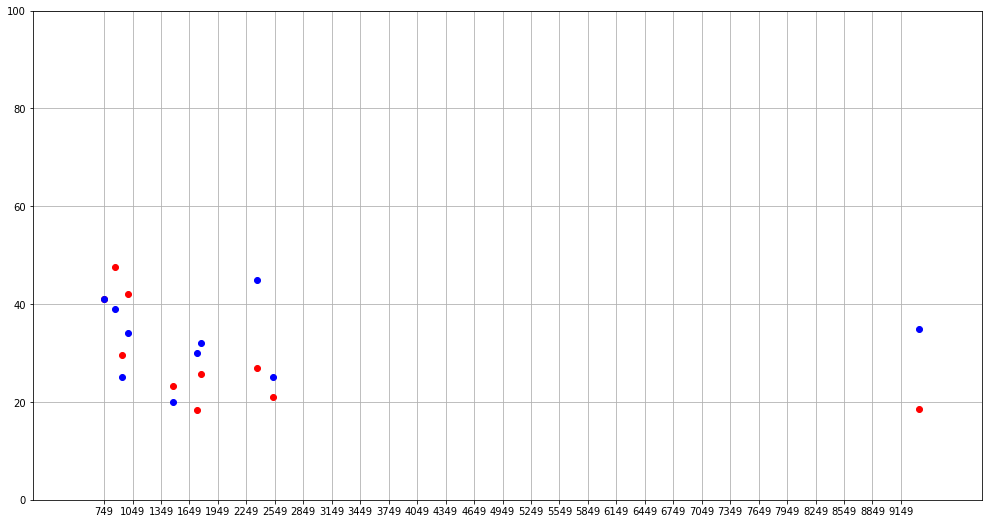

In [50]:
plt.figure(1, figsize=(17, 9))
plt.axis([0,10000,0,100])
plt.xticks(np.arange(min(all_without_train_acc_loss[:,0]), max(all_without_train_acc_loss[:,0])+1, 300.0))
plt.grid(True)
plt.plot(all_without_train_acc_loss[:,0],all_without_train_acc_loss[:,1],'ro')
plt.plot(test_acc_loss[:,0],test_acc_loss[:,1],'ro',color='blue')

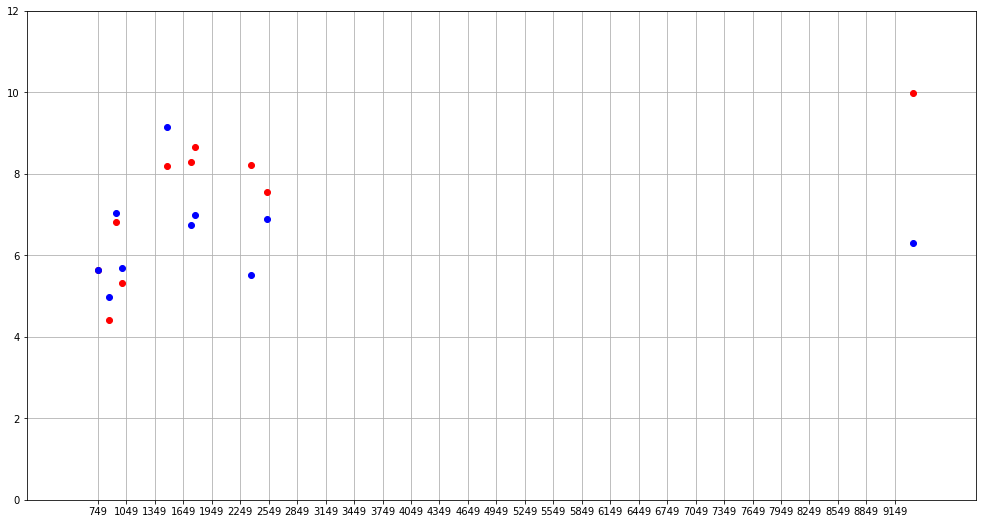

In [53]:
plt.figure(1, figsize=(17, 9))
plt.axis([0,10000,0,12])
plt.xticks(np.arange(min(all_without_train_acc_loss[:,0]), max(all_without_train_acc_loss[:,0])+1, 300.0))
plt.grid(True)
plt.plot(all_without_train_acc_loss[:,0],all_without_train_acc_loss[:,2],'ro')
plt.plot(test_acc_loss[:,0],test_acc_loss[:,2],'ro',color='blue')

# iter7000

In [9]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9 # not all GPU memory (1.0)
with tf.Session(graph=graph) as session:
    saver.restore(session,'./modelTmp/model_v0.2_iter7000.ckpt')
    print('Model restored')
    batch_data,batch_labels = generate_batch()
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    l, predictions = session.run([train_loss, train_prediction], feed_dict=feed_dict)
    print('Batch loss at step: %f' % (l))
    print('Batch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
    accuracy_full = 0.
    for i in range(N):
        test_data,test_labels = classes[i][4],classes[i][5]
        feed_dict={tf_test_dataset:test_data,tf_test_labels:test_labels}
        l, predictions = session.run([test_loss, test_prediction], feed_dict=feed_dict)
        acc = accuracy(predictions, test_labels)
        print(classes[i][0],acc,'%.1f'%l)
        test_acc_loss.append([classes[i][1],acc,l])
        accuracy_full += acc
    accuracy_full = accuracy_full/N
    print('Full test accuracy: %.1f%%' % accuracy_full)

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter7000.ckpt
Model restored
Batch loss at step: 0.014245
Batch accuracy: 99.0%
bottle 34.0 4.1
headphones 38.0 3.6
human 23.0 4.9
key 27.0 5.1
laptop 36.0 5.1
pen 44.0 4.5
phone 20.0 6.5
shoes 41.0 4.3
sodacan 31.0 4.0
wallet 48.0 3.6
Full test accuracy: 34.2%


In [10]:
def accuracy_loss_for_class_without_train(class_number):
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2_iter8000.ckpt')
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(len(os.listdir('./data/data_training/'+name))):
            if (i not in classes[class_number][2]):
                img = imageio.imread('./data/data_training/'+name
                                     +'/imagenet'+name+str(i)
                                     +'.jpg').astype(np.float32)
                image_data = (img - pixel_depth / 2) / pixel_depth
                feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
                prediction = session.run(one_prediction, feed_dict=feed_dict)
                predictions.append(prediction[0])
                labels.append(label)
                losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
    return acc,l

In [11]:
for i in range(10):
    acc,l = accuracy_loss_for_class_without_train(i)
    print(classes[i][0],acc,l)
    all_without_train_acc_loss.append([classes[i][1],acc,l])

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
bottle 18.3918669131 8.27846
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
headphones 47.6851851852 4.41025
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
human 20.9376664891 7.55959
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
key 29.6167247387 6.81258
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
laptop 25.7575757576 8.64961
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
pen 26.8848626534 8.20556
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
phone 23.3009708738 8.19384
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
shoes 18.5313075506 9.98322
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter8000.ckpt
sodacan 42.1203438395 5.31712
INFO:tensorflow:Restoring parameters from

# iter 14000

In [11]:
with tf.Session(graph=graph) as session:
    saver.restore(session,'./modelTmp/model_v0.2_iter14000.ckpt')
    print('Model restored')
    batch_data,batch_labels = generate_batch()
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    l, predictions = session.run([train_loss, train_prediction], feed_dict=feed_dict)
    print('Batch loss at step: %f' % (l))
    print('Batch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
    accuracy_full = 0.
    for i in range(N):
        test_data,test_labels = classes[i][4],classes[i][5]
        feed_dict={tf_test_dataset:test_data,tf_test_labels:test_labels}
        l, predictions = session.run([test_loss, test_prediction], feed_dict=feed_dict)
        acc = accuracy(predictions, test_labels)
        print(classes[i][0],acc,'%.1f'%l)
        test_acc_loss.append([classes[i][1],acc,l])
        accuracy_full += acc
    accuracy_full = accuracy_full/N
    print('Full test accuracy: %.1f%%' % accuracy_full)

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
Model restored
Batch loss at step: 0.067281
Batch accuracy: 99.0%
bottle 34.0 5.4
headphones 37.0 5.2
human 19.0 6.4
key 28.0 6.5
laptop 40.0 5.2
pen 46.0 4.9
phone 19.0 7.9
shoes 47.0 4.1
sodacan 33.0 5.4
wallet 42.0 5.4
Full test accuracy: 34.5%


In [12]:
test_acc_loss

[[1731, 34.0, 5.4307065],
 [865, 37.0, 5.2480931],
 [2526, 19.0, 6.4139013],
 [936, 28.0, 6.4831662],
 [1771, 40.0, 5.2175813],
 [2360, 46.0, 4.9227891],
 [1473, 19.0, 7.9091959],
 [9337, 47.0, 4.066606],
 [998, 33.0, 5.3956523],
 [749, 42.0, 5.418314]]

In [22]:
all_without_train_acc_loss

[[1731, 21.441774491682072, 6.6577969],
 [865, 42.129629629629626, 5.1347985],
 [2526, 22.322855620671284, 6.6143427],
 [936, 26.132404181184668, 6.7748246],
 [1771, 31.016042780748663, 6.6512437],
 [2360, 24.430157802454705, 7.5511203],
 [1473, 23.058252427184467, 7.492557],
 [9337, 25.161141804788215, 7.0903354],
 [998, 35.816618911174785, 5.2326388],
 [749, 42.0, 5.418314]]

In [23]:
train_acc_loss

[[1731, 99.229583975346685, 0.008127789],
 [865, 100.0, 0.001192083],
 [2526, 100.0, 1.7883553e-05],
 [936, 99.691833590138671, 0.0056010108],
 [1771, 100.0, 7.5789553e-06],
 [2360, 100.0, 4.2368989e-05],
 [1473, 100.0, 8.5280435e-06],
 [9337, 100.0, 2.529331e-05],
 [998, 99.845916795069343, 0.0059177643],
 [749, 99.845916795069343, 0.0013709463]]

In [15]:
-np.log(0.1)

2.3025850929940455

In [16]:
def accuracy_loss_for_class_without_train(class_number):
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2_iter14000.ckpt')
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(len(os.listdir('./data/data_training/'+name))):
            if (i not in classes[class_number][2]):
                img = imageio.imread('./data/data_training/'+name
                                     +'/imagenet'+name+str(i)
                                     +'.jpg').astype(np.float32)
                image_data = (img - pixel_depth / 2) / pixel_depth
                feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
                prediction = session.run(one_prediction, feed_dict=feed_dict)
                predictions.append(prediction[0])
                labels.append(label)
                losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
    return acc,l

In [17]:
for i in range(10):
    acc,l = accuracy_loss_for_class_without_train(i)
    print(classes[i][0],acc,l)
    all_without_train_acc_loss.append([classes[i][1],acc,l])

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
bottle 21.4417744917 6.6578
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
headphones 42.1296296296 5.1348
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
human 22.3228556207 6.61434
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
key 26.1324041812 6.77482
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
laptop 31.0160427807 6.65124
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
pen 24.4301578025 7.55112
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
phone 23.0582524272 7.49256
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
shoes 25.1611418048 7.09034
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
sodacan 35.8166189112 5.23264
INFO:tensorflow:Restoring paramete

In [20]:
def accuracy_loss_for_class_train(class_number):
    with tf.Session(graph=graph) as session:
        saver.restore(session,'./modelTmp/model_v0.2_iter14000.ckpt')
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(classes[class_number][2].shape[0]):
            img = imageio.imread('./data/data_training/'+name
                                    +'/imagenet'+name+str(classes[class_number][2][i])
                                    +'.jpg').astype(np.float32)
            image_data = (img - pixel_depth / 2) / pixel_depth
            feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
            prediction = session.run(one_prediction, feed_dict=feed_dict)
            predictions.append(prediction[0])
            labels.append(label)
            losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
    return acc,l

In [21]:
for i in range(10):
    acc,l = accuracy_loss_for_class_train(i)
    print(classes[i][0],acc,l)
    train_acc_loss.append([classes[i][1],acc,l])

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
bottle 99.2295839753 0.00812779
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
headphones 100.0 0.00119208
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
human 100.0 1.78836e-05
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
key 99.6918335901 0.00560101
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
laptop 100.0 7.57896e-06
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
pen 100.0 4.2369e-05
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
phone 100.0 8.52804e-06
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
shoes 100.0 2.52933e-05
INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
sodacan 99.8459167951 0.00591776
INFO:tensorflow:Restoring parameters from ./model

In [17]:
def results(conf_file):
    results_acc = [[],[],[],[],[],[]]
    results_loss = [[],[],[],[],[],[]]
    
    test_acc_loss = []
    all_without_train_acc_loss = []
    train_acc_loss = []
    
    def accuracy_loss_for_class_train(class_number):
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(classes[class_number][2].shape[0]):
            img = imageio.imread('./data/data_training/'+name
                                    +'/imagenet'+name+str(classes[class_number][2][i])
                                    +'.jpg').astype(np.float32)
            image_data = (img - pixel_depth / 2) / pixel_depth
            feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
            prediction = session.run(one_prediction, feed_dict=feed_dict)
            predictions.append(prediction[0])
            labels.append(label)
            losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
        return acc,l

    def accuracy_loss_for_class_without_train(class_number):
        predictions = []
        labels = []
        losses = []
        label = np.zeros(N)
        label[class_number] = 1
        name = classes[class_number][0]
        for i in range(len(os.listdir('./data/data_training/'+name))):
            if (i not in classes[class_number][2]):
                img = imageio.imread('./data/data_training/'+name
                                     +'/imagenet'+name+str(i)
                                     +'.jpg').astype(np.float32)
                image_data = (img - pixel_depth / 2) / pixel_depth
                feed_dict={tf_one_image : [image_data],tf_one_label : [label]}
                prediction = session.run(one_prediction, feed_dict=feed_dict)
                predictions.append(prediction[0])
                labels.append(label)
                losses.append(-np.log(prediction[0][class_number]))
        predictions = np.array(predictions)
        labels = np.array(labels)
        losses = np.array(losses)
        acc = accuracy(predictions,labels)
        l = losses.mean()
        return acc,l
    
    with tf.Session(graph=graph) as session:
        saver.restore(session,conf_file)
        
        for i in range(N):
            acc,l = accuracy_loss_for_class_train(i)
            train_acc_loss.append([classes[i][1],acc,l])
        train_acc_loss = np.array(train_acc_loss)
        
        for i in range(N):
            test_data,test_labels = classes[i][4],classes[i][5]
            feed_dict={tf_test_dataset:test_data,tf_test_labels:test_labels}
            l, predictions = session.run([test_loss, test_prediction], feed_dict=feed_dict)
            acc = accuracy(predictions, test_labels)
            test_acc_loss.append([classes[i][1],acc,l])
        test_acc_loss = np.array(test_acc_loss)
        test_acc_loss_mean = (test_acc_loss[:,1].mean(),test_acc_loss[:,2].mean())
        print('test_acc_loss_mean',test_acc_loss_mean)
    
        for i in range(N):
            acc,l = accuracy_loss_for_class_without_train(i)
            all_without_train_acc_loss.append([classes[i][1],acc,l])
        all_without_train_acc_loss = np.array(all_without_train_acc_loss)
    
    def s(st):
        return st[1]
    classessorted = []
    for i in range(N):
        classessorted.append([i,classes[i][1]])
    classessorted.sort(key=s)
    classessorted = np.array(classessorted)
    
    for i in range(N):
        j = classessorted[i][0]
        results_acc[0].append(j)
        results_acc[1].append(train_acc_loss[j][0])
        results_acc[2].append(train_acc_loss[j][1])
        results_acc[3].append(test_acc_loss[j][1])
        results_acc[4].append(all_without_train_acc_loss[j][1])
        results_acc[5].append(np.abs(all_without_train_acc_loss[j][1]-test_acc_loss[j][1]))
        
        results_loss[0].append(j)
        results_loss[1].append(train_acc_loss[j][0])
        results_loss[2].append(train_acc_loss[j][2])
        results_loss[3].append(test_acc_loss[j][2])
        results_loss[4].append(all_without_train_acc_loss[j][2])
        results_loss[5].append(np.abs(all_without_train_acc_loss[j][2]-test_acc_loss[j][2]))
    
    results_acc = np.round(results_acc,1)
    results_loss = np.round(results_loss,1)
    
    results_acc = np.array(results_acc)
    results_loss = np.array(results_loss)
    
    d = pd.DataFrame({
        'index':np.array(results_acc[0],dtype=np.int32),
        'images':np.array(results_acc[1],dtype=np.int32),
        'train':results_acc[2],
        'test':results_acc[3],
        'all':results_acc[4],
        'all-test':results_acc[5]
    })
    d.to_csv('./Clapeyron_CNN_research/tableAccClapeyron_CNN_v0.2.csv',index=False,
             columns=['index','images','train','test','all','all-test'])
    
    d = pd.DataFrame({
        'index':np.array(results_loss[0],dtype=np.int32),
        'images':np.array(results_loss[1],dtype=np.int32),
        'train':results_loss[2],
        'test':results_loss[3],
        'all':results_loss[4],
        'all-test':results_loss[5]
    })
    d.to_csv('./Clapeyron_CNN_research/tableLossClapeyron_CNN_v0.2.csv',index=False,
                columns=['index','images','train','test','all','all-test'])

In [18]:
results('./modelTmp/model_v0.2_iter14000.ckpt')

INFO:tensorflow:Restoring parameters from ./modelTmp/model_v0.2_iter14000.ckpt
test_acc_loss_mean (34.5, 5.6506006717681885)
